H2o Assignmern 2: Project Choice #1

http://coursera.h2o.ai/cacao.882.csv

This is a regression problem. You have to predict "Rating".

You should split the data into train, valid and test. Use a seed (of your choice) to make your experiments more reproducible. Alternatively, you can split into just train and test, and then use cross-validation.

Step one is to start h2o, load your data set, and split it if necessary. By the end of this stage you should have three variables, pointing to three data frames on h2o: train, valid, test. However, if you are choosing to use cross-validation, you will only have two: train and test.

In [1]:
import datetime
import math
import random
import pandas as pd
import numpy as np
import os, time, sys
import warnings
warnings.filterwarnings("ignore")

nfolds = 5
SEED = 123
random.seed(SEED)
now = datetime.datetime.now()

In [2]:
#Start H2o
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_102"; Java(TM) SE Runtime Environment (build 1.8.0_102-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.102-b14, mixed mode)
  Starting server from /Users/tim.wu/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/61/sfyb5b517dd3tj1_cdjsx6_w0000gn/T/tmpjhq_3jcu
  JVM stdout: /var/folders/61/sfyb5b517dd3tj1_cdjsx6_w0000gn/T/tmpjhq_3jcu/h2o_tim_wu_started_from_python.out
  JVM stderr: /var/folders/61/sfyb5b517dd3tj1_cdjsx6_w0000gn/T/tmpjhq_3jcu/h2o_tim_wu_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,1 month and 25 days
H2O cluster name:,H2O_from_python_tim_wu_3h5qh6
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
#load data Set
df = h2o.import_file("http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
df.summary()

,Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
type,enum,enum,int,int,real,enum,real,enum,enum
mins,,,5.0,2006.0,0.42,,1.0,,
mean,,,1035.9047353760463,2012.325348189414,0.7169832869080772,,3.185933147632313,,
maxs,,,1952.0,2017.0,1.0,,5.0,,
sigma,,,552.8863650101442,2.92721027766861,0.0632311833842919,,0.4780623935863306,,
zeros,,,0,0,0,,0,,
missing,0,0,0,0,0,0,0,1,1
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.7,France,3.0,,Togo


In [6]:
df = df.na_omit()
print(df.shape)

(1793, 9)


Step two is to set x to be the list of columns you will use to train on, to be the column you will learn. Your choice of y decides if it will be a classification or a regression.

In [7]:
train, valid, test = df.split_frame(ratios = [0.8, 0.1], destination_frames = ["train", "valid", "test"], seed=SEED)

Step two is to set x to be the list of columns you will use to train on, to be the column you will learn. Your choice of y decides if it will be a classification or a regression.

In [8]:
# Identify predictors and response
x = df.columns
y = "Rating"
x.remove(y)

Step three is to create a baseline deep learning model. It is recommended to use all default settings (remembering to specify either nfolds or validation_frame); if you want to use different settings you should include a comment in your source file justifying this. Allowable reasons are that the default settings were taking too long on your hardware, or that they were over-fitting. Your script must include timing code.

In [14]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
mDL = H2ODeepLearningEstimator(model_id = "DeepLearning_model_baseline_"+now.strftime("%Y-%m-%d_%H_%M_%S"),
                               seed = SEED
                              )
%time mDL.train(x, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 162 ms, sys: 133 ms, total: 295 ms
Wall time: 4.31 s


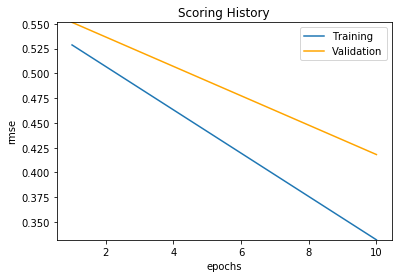

In [16]:
mDL.plot()

In [17]:
mDL.model_performance(test) 


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.17437369385600593
RMSE: 0.4175807632734127
MAE: 0.3408845128863432
RMSLE: 0.10681860235245275
Mean Residual Deviance: 0.17437369385600593


Step four is to produce a tuned model, that gives superior performance. However you should use no more than 10 times the running time of your baseline model, so again your script should be timing the model.

For steps three and four you should include, in comments in your source file, the results in your chosen metric on the train, valid (or cross-validation) and test data sets, as well as the running time. Also include a comment at the top of your script describing how many cores and how much memory you used (you can get both of these from the output of h2o.init()).

In [18]:
### Deep Learning Algorithm

activation_opt = ["RectifierWithDropout",
                  "TanhWithDropout"]
#L1 & L2 regularization
l1_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

l2_opt = [0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

In [19]:
# Create the Hyperparameters
dl_params = {
             'activation': activation_opt,
             "input_dropout_ratio" : [0,0.05, 0.1],  # input layer dropout ratio to improve generalization. Suggested values are 0.1 or 0.2.
             'l1': l1_opt,
             'l2': l2_opt,
             'hidden_dropout_ratios':[[0.1,0.2,0.3], # hidden layer dropout ratio to improve generalization: one value per hidden layer.
                                      [0.1,0.5,0.5],
                                      [0.5,0.5,0.5]]
             }

search_criteria = {
                   'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 1000,
                   'seed':SEED
}

In [20]:
# Prepare the grid object
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    epochs = 150,   ## hopefully converges earlier...
                                                    adaptive_rate = True,  
                                                    stopping_metric="AUTO",
                                                    stopping_rounds=2,
                                                    stopping_tolerance=0.0005,
                                                    hidden=[200,200,200],      ## more hidden layers -> more complex interactions
                                                    balance_classes= False,
                                                    standardize = True,  # If enabled, automatically standardize the data (mean 0, variance 1). If disabled, the user must provide properly scaled input data.
                                                    loss = "quantile",  # quantile for regression
                                                    seed=SEED
                                                    ),
                        grid_id='dl_grid'+now.strftime("%Y-%m-%d_%H_%M_%S"),
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

Step five is to save both your models, to your local disk, and they should be submitted with your script. Use saveModel() (in R) or save_model() (Python), to export the binary version of the model. (Do not export a POJO.)

In [40]:
mDL2 = H2ODeepLearningEstimator(model_id = "DeepLearning_model_best_"+now.strftime("%Y-%m-%d_%H_%M_%S"),
                                epochs = 80,   ## hopefully converges earlier...
                                score_validation_samples=10000,  # downsample validation set for faster scoring
                                score_duty_cycle=0.025,          # don't score more than 2.5% of the wall time
                                adaptive_rate=False,             # manually tuned learning rate
                                rate=0.01, 
                                rate_annealing=0.000002,            
                                momentum_start=0.2,              # manually tuned momentum
                                momentum_stable=0.4, 
                                momentum_ramp=10000000, 
                                #adaptive_rate = True,  
                                stopping_metric="AUTO", # use early stopping to avoid overfitting
                                stopping_rounds=2,
                                stopping_tolerance=0.0005,
                                hidden=[200,200,200],      ## more hidden layers -> more complex interactions
                                balance_classes= False,
                                standardize = True,  # If enabled, automatically standardize the data (mean 0, variance 1). If disabled, the user must provide properly scaled input data.
                                loss = "quantile",  # quantile for regression
                                seed=SEED,
                                activation = "RectifierWithDropout",
                                hidden_dropout_ratios = [0.1, 0.5, 0.5], 
                                input_dropout_ratio = 0.05,
                                l1=1.0E-5,                      
                                l2=0.01
                               )


In [41]:
%time mDL2.train(x, y, training_frame=train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 243 ms, sys: 190 ms, total: 432 ms
Wall time: 20.1 s


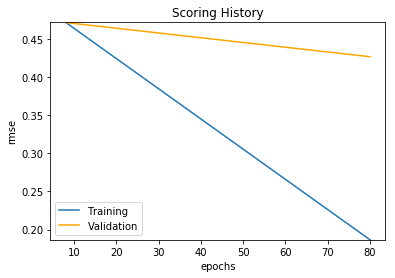

In [42]:
mDL2.plot()

In [43]:
mDL2.model_performance(valid) 


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.18218255404395914
RMSE: 0.42682848316854294
MAE: 0.3235138450106631
RMSLE: 0.10996925274199085
Mean Residual Deviance: 0.16175692250533155


In [44]:
mDL2.model_performance(test) 


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.17192888065994577
RMSE: 0.4146430762233294
MAE: 0.3283172569034881
RMSLE: 0.10773891967730584
Mean Residual Deviance: 0.16415862845174406


In [34]:
cwd = os.getcwd()
cwd

'/Users/tim.wu/Documents/Programming_Code/python_code/python_h2o'

In [ ]:
h2o.save_model(mDL, path = cwd + "/H2o_model_Base_deep_learning")

In [ ]:
h2o.save_model(mDL2, path = cwd + "/H2o_model_BEST_deep_learning")

Step six is to save your script, shutdown h2o, and run your script again in a fresh session to be sure the results are reproducible, and that there are no bugs. This is a very important step: scripts that do not run might fail to be graded.

In [ ]:
h2o.cluster().shutdown()